In [1]:
import requests
import config
from bs4 import BeautifulSoup as BS
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
#pip install sodapy

import pandas as pd
from sodapy import Socrata
import config_nyc_od

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)


In [ ]:
# Example authenticated client (needed for non-public datasets):
client = Socrata('data.cityofnewyork.us',
                 config_nyc_od.app_tok,
                 username=config_nyc_od.app_username,
                 password=config_nyc_od.app_pw)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
#results = client.get("tg4x-b46p", limit=2000)

# Convert to pandas DataFrame
#results_df = pd.DataFrame.from_records(results)

In [ ]:
felony_df = pd.read_excel(r'felony_clean.xls')
felony_df['PCT'].fillna( method ='ffill', inplace = True)
felony_df = felony_df[felony_df['CRIME']=='TOTAL SEVEN MAJOR FELONY OFFENSES']
felony_df.head(10)

In [ ]:
other_felony_df = pd.read_excel(r'other_felony.xls')
other_felony_df['PCT'].fillna( method ='ffill', inplace = True)
other_felony_df = other_felony_df[other_felony_df['CRIME']=='TOTAL NON-SEVEN MAJOR FELONY OFFENSES']
other_felony_df.head()

In [ ]:
misdemeanor_df = pd.read_excel(r'misdemeanor_pct.xls')
misdemeanor_df['PCT'].fillna( method = 'ffill', inplace = True)
misdemeanor_df = misdemeanor_df[misdemeanor_df['CRIME']=='TOTAL MISDEMEANOR OFFENSES']
misdemeanor_df.head(20)

In [ ]:
violation_df = pd.read_excel(r'violation_pct.xls')
violation_df['PCT'].fillna( method = 'ffill', inplace = True)
violation_df = violation_df[violation_df['CRIME']=='TOTAL VIOLATION OFFENSES']
violation_df.head(20)

In [ ]:
# felony_df = felony_df.set_index('PCT')
# other_felony_df = other_felony_df.set_index('PCT')
# misdemeanor_df = misdemeanor_df.set_index('PCT')
# violation_df = violation_df.set_index('PCT')

In [ ]:
felony_df

In [ ]:
x = felony_df['PCT']
y = felony_df.iloc[3]

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x, y, s=200)
#ax.legend(prop={'size': 15})
plt.title('title', fontsize=25)
plt.xticks(size=15)
plt.xlabel('xlabel', size=25)
plt.ylabel('ylabel', size=25)
plt.show()

In [ ]:
#fig, ax = plt.subplots(figsize=(20, 10))
felony_df2 = felony_df.set_index('PCT')
felony_df2.plot.bar(figsize=(16,8))
#plt.show()

In [29]:
rent_df = pd.read_csv("median_rent.csv")
rent_df

,areaName,Borough,areaType,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3050.0,3100.0,3100.0,3200.0,3195.0,...,3650.0,3750.0,3735.0,3750.0,3827.0,3800.0,3795.0,3800.0,3850.0,3850.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3400.0,3392.0,3450.0,3500.0,3525.0,3550.0,3550.0,3573.0,3595.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2929.0,2900.0,2869.0,2850.0,2850.0,2900.0,2950.0,2900.0,2900.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2261.0,2291.0,2300.0,2350.0,2375.0,2395.0,2425.0,2400.0,2350.0,2350.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3350.0,3290.0,3250.0,3290.0,3300.0,3350.0,3350.0,3348.0,3400.0,3400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Windsor Terrace,Brooklyn,neighborhood,1600.0,1650.0,1650.0,1600.0,1800.0,1825.0,1995.0,...,2400.0,2400.0,2472.0,2500.0,2500.0,2500.0,2550.0,2688.0,2681.0,2643.0
198,Woodhaven,Queens,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2100.0,2200.0,2175.0,1800.0,1625.0,1763.0,1950.0,1850.0,1725.0,1850.0
199,Woodlawn,Bronx,neighborhood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,Woodside,Queens,neighborhood,1813.0,NaN,1398.0,2000.0,1475.0,1488.0,NaN,...,1795.0,1775.0,1963.0,1975.0,1995.0,1985.0,1750.0,1825.0,2000.0,1850.0


In [25]:
#df.columns = ['log(gdp)' if x=='gdp' else 'cap_mod' if x=='cap' else x for x in df.columns]
# rent_df.columns = ['year 2010' if "2010" in x else
#                    'year 2011' if "2011" in x else
#                    'year 2012' if "2012" in x else
#                    'year 2013' if "2013" in x else
#                    'year 2014' if "2014" in x else
#                    'year 2015' if "2015" in x else
#                    'year 2016' if "2016" in x else
#                    'year 2017' if "2017" in x else
#                    'year 2018' if "2018" in x else
#                    x for x in rent_df.columns]

In [26]:
rent_df.head()

,areaName,Borough,areaType,year 2010,year 2010,year 2010,year 2010,year 2010,year 2010,year 2010,...,year 2018,year 2018,year 2018,year 2018,year 2018,year 2018,year 2018,year 2018,year 2018,year 2018
0,All Downtown,Manhattan,submarket,3200.0,3200.0,3050.0,3100.0,3100.0,3200.0,3195.0,...,3650.0,3750.0,3735.0,3750.0,3827.0,3800.0,3795.0,3800.0,3850.0,3850.0
1,All Midtown,Manhattan,submarket,2895.0,2800.0,2800.0,2850.0,2900.0,2950.0,3000.0,...,3395.0,3400.0,3392.0,3450.0,3500.0,3525.0,3550.0,3550.0,3573.0,3595.0
2,All Upper East Side,Manhattan,submarket,2469.0,2450.0,2400.0,2500.0,2550.0,2550.0,2595.0,...,2929.0,2900.0,2869.0,2850.0,2850.0,2900.0,2950.0,2900.0,2900.0,3000.0
3,All Upper Manhattan,Manhattan,submarket,1825.0,1800.0,1795.0,1800.0,1823.0,1850.0,1875.0,...,2261.0,2291.0,2300.0,2350.0,2375.0,2395.0,2425.0,2400.0,2350.0,2350.0
4,All Upper West Side,Manhattan,submarket,2895.0,2800.0,2750.0,2800.0,2798.0,2795.0,2800.0,...,3350.0,3290.0,3250.0,3290.0,3300.0,3350.0,3350.0,3348.0,3400.0,3400.0


In [28]:
rent_df.mean(axis = 0, skipna = True) 

year 2010    2308.238636
year 2010    2272.852273
year 2010    2263.127907
year 2010    2288.183908
year 2010    2328.433735
                ...     
year 2018    2561.437500
year 2018    2569.591837
year 2018    2579.618421
year 2018    2560.713333
year 2018    2543.410596
Length: 106, dtype: float64

In [7]:
mean_rent_df = rent_df.groupby(['Borough']).mean()
mean_rent_df.

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10
Borough,,,,,,,,,,,,,,,,,,,,,
Bronx,1421.000000,1410.750000,1402.000000,1495.250000,1575.000000,1566.666667,1864.500000,2062.500000,1900.000000,1616.666667,...,1748.750000,1760.947368,1754.777778,1823.944444,1803.363636,1860.173913,1816.160000,1813.407407,1846.961538,1873.296296
Brooklyn,2025.500000,1977.545455,1981.870968,1978.969697,2063.333333,2054.344828,2171.607143,2152.250000,2225.741935,2208.848485,...,2361.428571,2376.857143,2387.340426,2411.510638,2492.104167,2511.583333,2530.583333,2521.372549,2504.428571,2476.080000
Manhattan,2982.685714,2987.441176,2929.029412,2969.294118,2914.342857,2946.800000,2967.029412,2980.411765,3191.117647,3230.000000,...,3431.444444,3413.815789,3399.789474,3430.578947,3460.394737,3503.351351,3524.736842,3569.631579,3564.368421,3541.473684
Queens,1598.812500,1558.500000,1587.250000,1611.933333,1566.384615,1555.857143,1582.769231,1648.909091,1680.818182,1669.769231,...,2074.448276,2004.000000,2055.625000,2067.787879,2021.514286,2094.000000,2121.411765,2179.529412,2089.371429,2073.411765
Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1800.000000,1842.000000,1800.000000,1825.000000,1829.000000,1887.000000,1950.000000,2000.000000,2000.000000,1900.000000


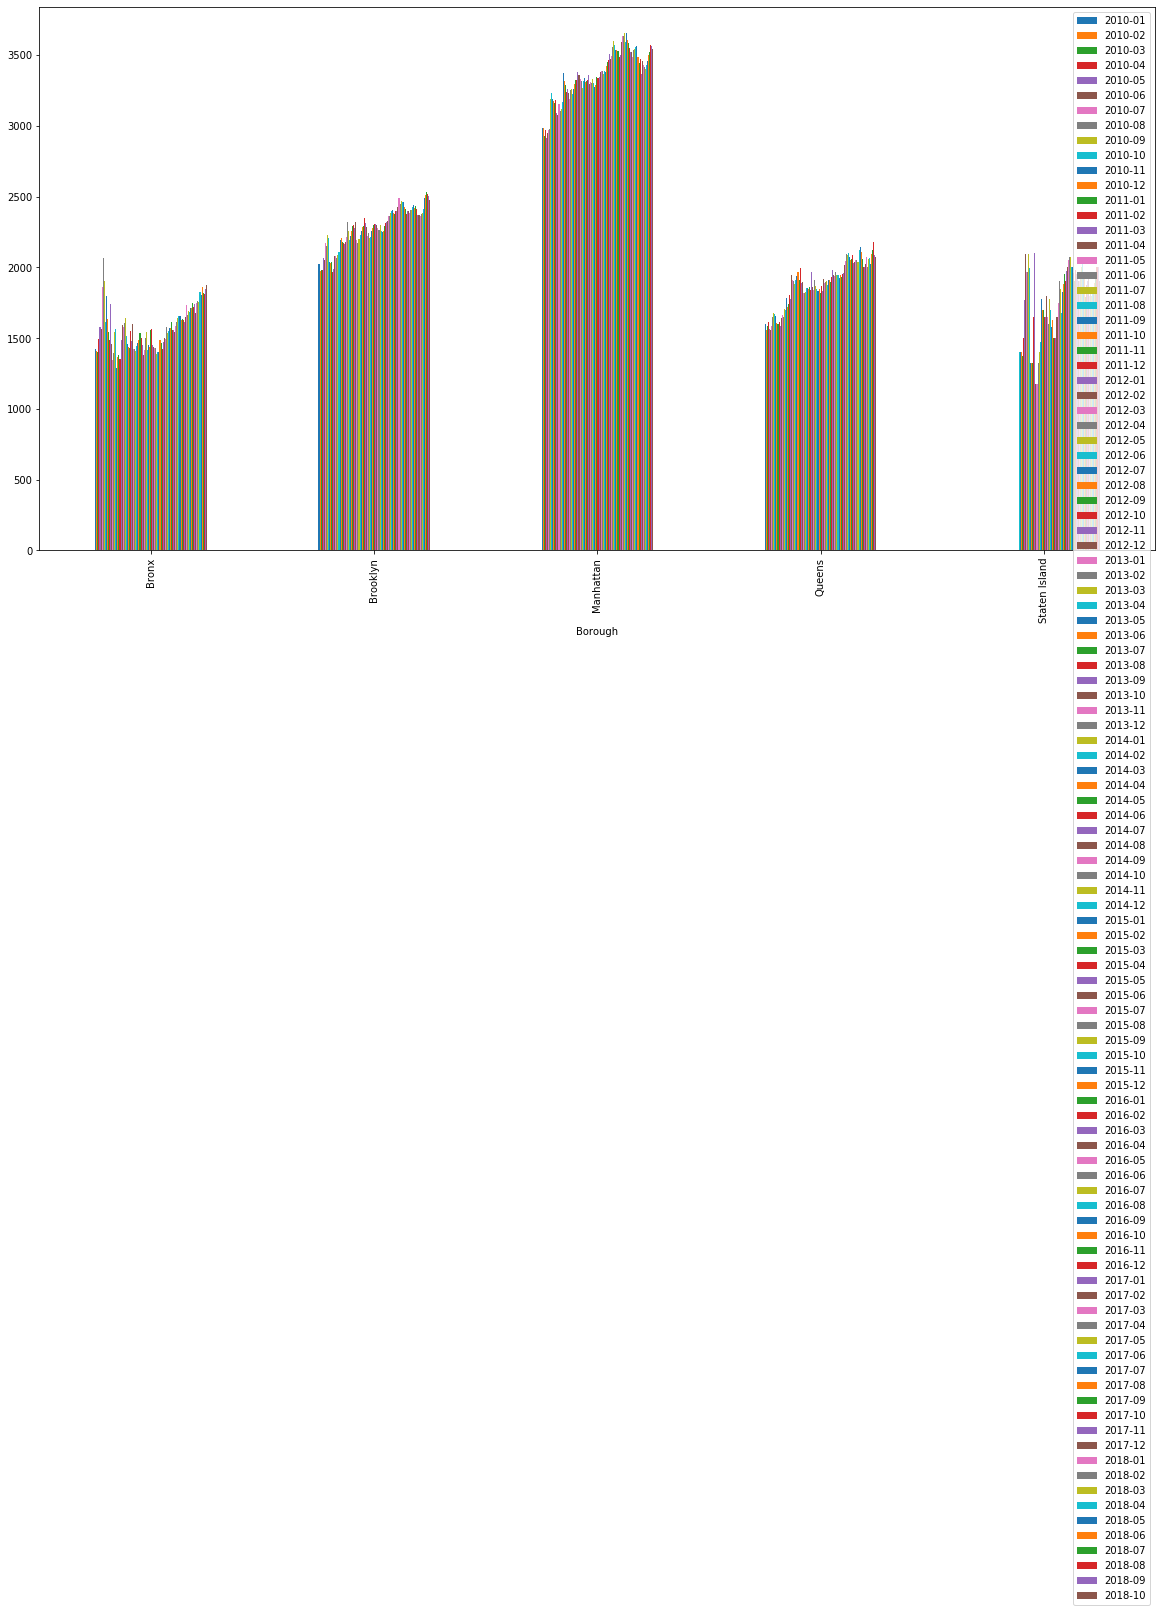

In [8]:
mean_rent_df.plot.bar(figsize=(20,10))